In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [2]:
df = pd.read_sas('whas500.sas7bdat')
df.head()

,ID,AGE,GENDER,HR,SYSBP,DIASBP,BMI,CVD,AFB,SHO,CHF,AV3,MIORD,MITYPE,YEAR,LOS,DSTAT,LENFOL,FSTAT
0,1.0,83.0,0.0,89.0,152.0,78.0,25.540510,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,2178.0,0.0
1,2.0,49.0,0.0,84.0,120.0,60.0,24.023979,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,2172.0,0.0
2,3.0,70.0,1.0,83.0,147.0,88.0,22.142900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,2190.0,0.0
3,4.0,70.0,0.0,65.0,123.0,76.0,26.631870,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,10.0,0.0,297.0,1.0
4,5.0,70.0,0.0,63.0,135.0,85.0,24.412550,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,2131.0,0.0


In [3]:
df = df[["LENFOL", "AFB", "FSTAT"]]

In [4]:
df['LENFOL'] = df['LENFOL']/365.25
df['LENFOL'] = df['LENFOL'].round(decimals = 2)

In [5]:
# Create Kaplan-Meier estimator
kmf = KaplanMeierFitter()

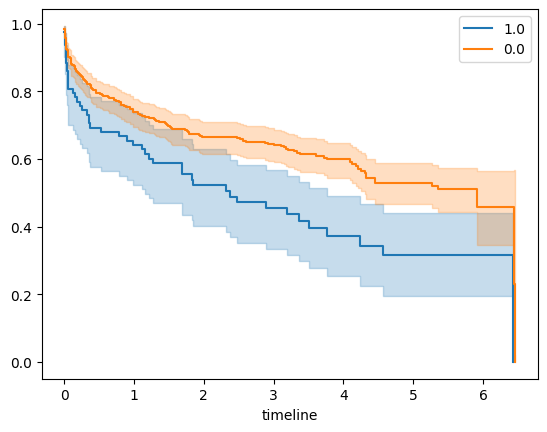

In [7]:
# Fit Kaplan-Meier estimator to groups
groups = df['AFB'].unique()
for group in groups:
   group_data = df[df['AFB'] == group]
   kmf.fit(group_data['LENFOL'], event_observed=group_data['FSTAT'], label=group)
   kmf.plot()

In [8]:
# Log-rank test
results = logrank_test(df[df['AFB'] == 1.0 ]['LENFOL'],
                      df[df['AFB'] == 0.0 ]['LENFOL'],
                      event_observed_A=df[df['AFB'] == 1.0 ]['FSTAT'],
                      event_observed_B=df[df['AFB'] == 0.0 ]['FSTAT'])

In [9]:
# Display log-rank test results
print("Log-Rank Test Results:")
print("p-value:", results.p_value)
print("test statistic:", results.test_statistic)

Log-Rank Test Results:
p-value: 0.0009646026542308663
test statistic: 10.894307111437298


In [10]:
# Calculate log-log confidence interval
confidence_interval = kmf.confidence_interval_survival_function_
print("Log-Log Confidence Interval for Group B:")
print(confidence_interval)

Log-Log Confidence Interval for Group B:
      0.0_lower_0.95  0.0_upper_0.95
0.00        0.968628        0.993587
0.01        0.933150        0.972911
0.02        0.908081        0.955672
0.03        0.894472        0.945764
0.04        0.891771        0.943761
...              ...             ...
5.94        0.345753        0.565624
5.95        0.345753        0.565624
6.00        0.345753        0.565624
6.44        0.021751        0.568185
6.46        0.000000        0.000000

[246 rows x 2 columns]
